<a href="https://colab.research.google.com/github/Gatheroxign34/DataToolbox-An-Educator-s-Take/blob/main/LH_Capstone_III_Trends_in_College_Debt_in_the_U_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following are packages needed to perform all the necessary tests and create the visuals needed to inform our analysis to answer the following first hypotheses:

Null: There is no relationship between grad debt and grad median earnings.

Alternate: There is a relationship between grad debt and grad median earnings. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind_from_stats
from scipy import stats

In [ ]:
college_debt_1 = pd.read_csv('Most_Recent_Cohorts_Scorecard_Elements_Cleaned .csv')

In [ ]:
print(college_debt_1.head())

   index  UNITID    OPEID  OPEID6                               INSTNM  \
0      0  100654   100200    1002             Alabama A & M University   
1      1  100663   105200    1052  University of Alabama at Birmingham   
2      2  100690  2503400   25034                   Amridge University   
3      3  100706   105500    1055  University of Alabama in Huntsville   
4      4  100724   100500    1005             Alabama State University   

         CITY STABBR   UGDS  UGDS_WHITE  UGDS_BLACK  ...  UGDS_AIAN  \
0      Normal     AL   4206      0.0333      0.9353  ...     0.0024   
1  Birmingham     AL  11383      0.5922      0.2600  ...     0.0022   
2  Montgomery     AL    291      0.2990      0.4192  ...     0.0000   
3  Huntsville     AL   5451      0.6988      0.1255  ...     0.0143   
4  Montgomery     AL   4811      0.0158      0.9208  ...     0.0010   

   UGDS_NHPI  UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PCTFLOAN  UG25ABV  \
0     0.0019     0.0000    0.0059     0.0138    0.8284   0.10

I created the following region series to see if there is a strong pattern of correlation in my scatterplot between graduate college debt and graduate median earnings by region.

In [ ]:
college_debt_1['Southwest'] = college_debt_1['STABBR'].isin(['CA', 'AZ', 'NV', 'CO', 'UT', 'TX', 'OK', 'NM'])

college_debt_1['Southwest']

college_debt_1['Northeast'] = college_debt_1['STABBR'].isin(['CT', 'MA', 'NY', 'NJ', 'VT', 'ME', 'RI', 'NH', 'PA'])

college_debt_1['Northeast']

college_debt_1['Southeast'] = college_debt_1['STABBR'].isin(['GA', 'AL', 'AR', 'MS', 'FL', 'NC', 'SC', 'TN', 'LA', 'KY', 'WV', 'VI', 'MD'])

college_debt_1['Southeast']

college_debt_1['Northwest'] = college_debt_1['STABBR'].isin(['OR', 'WA', 'ID', 'WY', 'MT'])

college_debt_1['Northwest']

college_debt_1['Northcentral'] = college_debt_1['STABBR'].isin(['IL', 'IN', 'OH', 'IA', 'ND', 'SD', 'MI', 'KS', 'MN', 'MO', 'NE', 'WI'])

college_debt_1['Northcentral']

college_debt_1['Hawaii'] = college_debt_1['STABBR'].isin(['HI'])

college_debt_1['Hawaii']

college_debt_1['Alaska'] = college_debt_1['STABBR'].isin(['AK'])

college_debt_1['Alaska']

0       False
1       False
2       False
3       False
4       False
        ...  
4707    False
4708    False
4709    False
4710    False
4711    False
Name: Alaska, Length: 4712, dtype: bool

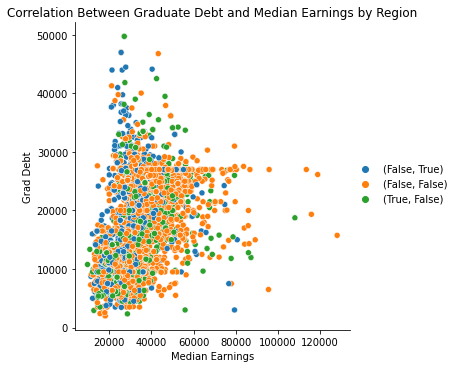

In [ ]:
sns.relplot(x='MD_EARN_WNE_P10', y='GRAD_DEBT_MDN_SUPP', data= college_debt_1,
            hue=college_debt_1[['Southwest', 'Southeast']].apply(tuple, axis=1))

xlab = 'Median Earnings'
ylab = 'Grad Debt'
title = 'Graduate Debt Versus Median Earnings by Region'

plt.xlabel('Median Earnings')
plt.ylabel('Grad Debt')

plt.title('Correlation Between Graduate Debt and Median Earnings by Region')


sns.despine()

In [ ]:
stats.pearsonr(college_debt_1['MD_EARN_WNE_P10'], college_debt_1['GRAD_DEBT_MDN_SUPP'])

(0.46836222703625874, 1.2941136663084153e-255)

I would reject the null hypothesis that there in no relationship between  grad debt and median earnings. I would accept the alternate hypothesis because there is a moderate correlation between median earnings and grad debt. The scatterplot shows this moderate correlation as well as the correlation coefficient .468.

The southeast shown in blue has less median earnings and more debt that the southwest in green. If you drew a vertical line starting at 20,000 median earnings moving up the y axis your line would intersect with many blue points.   

Part II



Null: There is no significant difference in average college student debt by ethnicity for large 
universities.

Alternate: There is a significant difference in average college student debt by ethnicity for large 
universities. 

The following code creates ethnic groups from the data by multiplying the total undergraduate population by the proportion in each university or college. 


In [ ]:
college_debt_1['Num_White_UGDS'] = college_debt_1['UGDS_WHITE'] * college_debt_1['UGDS']
college_debt_1['Num_Black_UGDS'] = college_debt_1['UGDS_BLACK'] * college_debt_1['UGDS']
college_debt_1['Num_Hispanic_UGDS'] = college_debt_1['UGDS_HISP'] * college_debt_1['UGDS']
college_debt_1['Num_Amer_Indian_UGDS'] = college_debt_1['UGDS_AIAN'] * college_debt_1['UGDS']
college_debt_1['Num_Pacific_Isld_UGDS'] = college_debt_1['UGDS_NHPI'] * college_debt_1['UGDS']
college_debt_1['Num_Mixed_UGDS'] = college_debt_1['UGDS_2MOR'] * college_debt_1['UGDS']
college_debt_1['Num_Asian_UGDS'] = college_debt_1['UGDS_ASIAN'] * college_debt_1['UGDS']

In [ ]:
college_debt_1['White'] = college_debt_1['Num_White_UGDS']>= 1
college_debt_1['Black'] = college_debt_1['Num_Black_UGDS']>= 1
college_debt_1['Hispanic'] = college_debt_1['Num_Hispanic_UGDS']>= 1
college_debt_1['American Indian'] = college_debt_1['Num_Amer_Indian_UGDS']>= 1
college_debt_1['Pacific Islander'] = college_debt_1['Num_Pacific_Isld_UGDS']>= 1
college_debt_1['Mixed'] = college_debt_1['Num_Mixed_UGDS']>= 1
college_debt_1['Asian'] = college_debt_1['Num_Asian_UGDS']>= 1

https://carnegieclassifications.acenet.edu/classification_descriptions/size_setting.php this website indicates that large universities are more than or equal to 10000.

In [ ]:
college_debt_1['Large Universities'] = college_debt_1['UGDS']>= 10000 

In [ ]:
college_debt_1['White_Stud_College_Debt'] = college_debt_1['White'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['White_Stud_Large_Uni_Debt'] = college_debt_1['Large Universities'] & college_debt_1['White_Stud_College_Debt']

In [ ]:
college_debt_1['Black_Stud_College_Debt'] = college_debt_1['Black'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Black_Stud_Large_Uni_Debt'] = college_debt_1['Large Universities'] & college_debt_1['Black_Stud_College_Debt']

Descriptive Statistics on the two groups average debt for white students versus black students in large universities.

In [ ]:
def series_statistics(column):
  print('statistics: {}'.format(column.name))
  print('The max value: {}'.format(column.max()))
  print('The min value: {}'.format(column.min()))
  print('The mode value: {}'.format(column.mode()))
  print('The median value: {}'.format(column.median()))
  print('The mean: {}'.format(column.mean()))
  print('The std: {}'.format(column.std()))

In [ ]:
series_statistics(college_debt_1['White_Stud_Large_Uni_Debt'].astype(int))

statistics: White_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08191850594227504
The std: 0.27426962762297025


In [ ]:
series_statistics(college_debt_1['Black_Stud_Large_Uni_Debt'].astype(int))

statistics: Black_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08191850594227504
The std: 0.27426962762297025


Independent sample t-tests for our two groups.

In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Large_Uni_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))

mean2 = np.mean(np.array(college_debt_1['Black_Stud_Large_Uni_Debt']))
std2 = np.std(np.array(college_debt_1['Black_Stud_Large_Uni_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Black_Stud_Large_Uni_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=0.0, pvalue=1.0)

Barplots to show a visual difference in means. In this case, however, there is no difference in means of the two groups. 

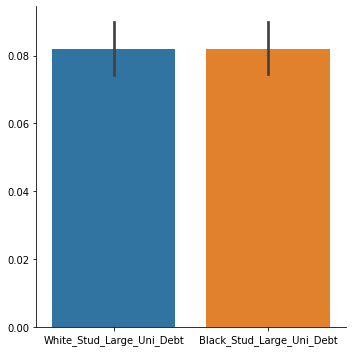

In [ ]:
category_order = ['White_Stud_Large_Uni_Debt','Black_Stud_Large_Uni_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()



We must fail to reject the Null Hypothesis because there is no difference between white (.0819) and black students (.0819) average debt in large universities. The max is 1 because we are looking at averages. 

Now, we will look to see if there is a difference in average debt between white and hispanic students at large universities. We will go through the same steps as we did with white and black students' average debt at large universities. 

In [ ]:
college_debt_1['Hispanic_Stud_College_Debt'] = college_debt_1['Hispanic'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Hispanic_Stud_Large_Uni_Debt'] = college_debt_1['Large Universities'] & college_debt_1['Hispanic_Stud_College_Debt']

In [ ]:
def series_statistics(column):
  print('statistics: {}'.format(column.name))
  print('The max value: {}'.format(column.max()))
  print('The min value: {}'.format(column.min()))
  print('The mode value: {}'.format(column.mode()))
  print('The median value: {}'.format(column.median()))
  print('The mean: {}'.format(column.mean()))
  print('The std: {}'.format(column.std()))

In [ ]:
series_statistics(college_debt_1['White_Stud_Large_Uni_Debt'].astype(int))

statistics: White_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08191850594227504
The std: 0.27426962762297025


In [ ]:
series_statistics(college_debt_1['Hispanic_Stud_Large_Uni_Debt'].astype(int))

statistics: Hispanic_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08276740237691002
The std: 0.2755595658105553


In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Large_Uni_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))

mean2 = np.mean(np.array(college_debt_1['Hispanic_Stud_Large_Uni_Debt']))
std2 = np.std(np.array(college_debt_1['Hispanic_Stud_Large_Uni_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Hispanic_Stud_Large_Uni_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=-0.14987988731374607, pvalue=0.8808625882027221)

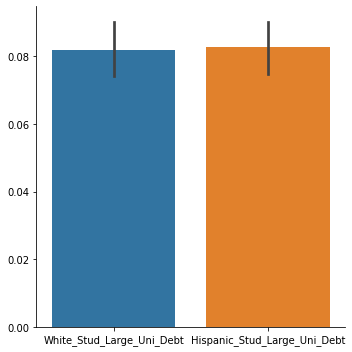

In [ ]:
category_order = ['White_Stud_Large_Uni_Debt','Hispanic_Stud_Large_Uni_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()

Although the pvalue is slightly lower for the difference in means between white and hispanic students at .88. There is no significant difference in means between the two groups. The descriptive statistics state that white students' average debt is .0819 and hispanic students' average debt is .0827 in large universities. We fail to reject the null hypothesis.  

Now, we will look to see if there is a difference in average debt between White and Asian students at large universities.

In [ ]:
college_debt_1['Asian_Stud_College_Debt'] = college_debt_1['Asian'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Asian_Stud_Large_Uni_Debt'] = college_debt_1['Large Universities'] & college_debt_1['Asian_Stud_College_Debt']

In [ ]:
series_statistics(college_debt_1['White_Stud_Large_Uni_Debt'].astype(int))

statistics: White_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08191850594227504
The std: 0.27426962762297025


In [ ]:
series_statistics(college_debt_1['Asian_Stud_Large_Uni_Debt'].astype(int))

statistics: Asian_Stud_Large_Uni_Debt
The max value: 1
The min value: 0
The mode value: 0    0
dtype: int64
The median value: 0.0
The mean: 0.08191850594227504
The std: 0.27426962762297025


In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Large_Uni_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Large_Uni_Debt']))

mean2 = np.mean(np.array(college_debt_1['Asian_Stud_Large_Uni_Debt']))
std2 = np.std(np.array(college_debt_1['Asian_Stud_Large_Uni_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Asian_Stud_Large_Uni_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=0.0, pvalue=1.0)

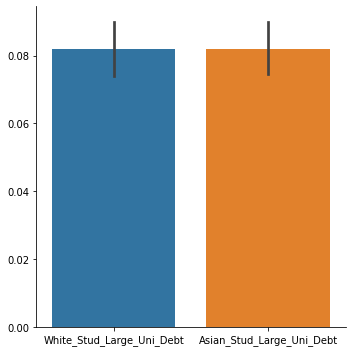

In [ ]:
category_order = ['White_Stud_Large_Uni_Debt','Asian_Stud_Large_Uni_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()

Again, we must fail to reject the Null Hypothesis because there is no difference between white (.0819) and asian students (.0819) average debt in large universities. Just like between white and black students' average debt in large universities we have p-value of 1, 0 difference in means. 

Now, lets look at small colleges and see if there's a difference in average debt for the same ethnic groups. 

Remember that we are using the Carnegie University size designation for guidance on college sizes. https://carnegieclassifications.acenet.edu/classification_descriptions/size_setting.php this website indicates that small colleges are less than or equal to 2999. 

These are the original hypotheses for small colleges. 

Null: There is no significant difference in average college student debt by ethnicity for small colleges.

Alternate: There is a significant difference in average college student debt by ethnicity for small colleges. 

In [ ]:
college_debt_1['Small College'] = college_debt_1['UGDS']<= 2999 

In [ ]:
college_debt_1['White_Stud_Coll_Debt'] = college_debt_1['White'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['White_Stud_Small_Coll_Debt'] = college_debt_1['Small College'] & college_debt_1['White_Stud_College_Debt']

In [ ]:
college_debt_1['Black_Stud_Coll_Debt'] = college_debt_1['Black'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Black_Stud_Small_Coll_Debt'] = college_debt_1['Small College'] & college_debt_1['Black_Stud_College_Debt']

In [ ]:
def series_statistics(column):
  print('statistics: {}'.format(column.name))
  print('The max value: {}'.format(column.max()))
  print('The min value: {}'.format(column.min()))
  print('The mode value: {}'.format(column.mode()))
  print('The median value: {}'.format(column.median()))
  print('The mean: {}'.format(column.mean()))
  print('The std: {}'.format(column.std()))

In [ ]:
series_statistics(college_debt_1['White_Stud_Small_Coll_Debt'].astype(int))

statistics: White_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.7370543293718166
The std: 0.44027989257073435


In [ ]:
series_statistics(college_debt_1['Black_Stud_Small_Coll_Debt'].astype(int))

statistics: Black_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.7236842105263158
The std: 0.4472223389351621


In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Small_Coll_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))

mean2 = np.mean(np.array(college_debt_1['Black_Stud_Small_Coll_Debt']))
std2 = np.std(np.array(college_debt_1['Black_Stud_Small_Coll_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Black_Stud_Small_Coll_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=1.462413426480347, pvalue=0.14366131374419033)

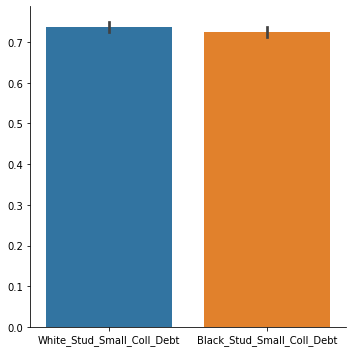

In [ ]:
category_order = ['White_Stud_Small_Coll_Debt','Black_Stud_Small_Coll_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()

The p-value is much smaller between White and Black students for small colleges at 0.143. But, the p-value is not less than .05. The means are white(.74) and black (.73) so between our visuals, descriptive statistics and the independent t-test, we can conclude that we must fail to reject the null hypothesis that there is no signicant difference in average college debt for white and black students in small colleges. 

Now, let's look at White students versus Hispanic students' average college debt in small colleges. 

In [ ]:
college_debt_1['Hispanic_Stud_Coll_Debt'] = college_debt_1['Hispanic'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Hispanic_Stud_Small_Coll_Debt'] = college_debt_1['Small College'] & college_debt_1['Hispanic_Stud_College_Debt']

In [ ]:
def series_statistics(column):
  print('statistics: {}'.format(column.name))
  print('The max value: {}'.format(column.max()))
  print('The min value: {}'.format(column.min()))
  print('The mode value: {}'.format(column.mode()))
  print('The median value: {}'.format(column.median()))
  print('The mean: {}'.format(column.mean()))
  print('The std: {}'.format(column.std()))

In [ ]:
series_statistics(college_debt_1['White_Stud_Small_Coll_Debt'].astype(int))

statistics: White_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.7370543293718166
The std: 0.44027989257073435


In [ ]:
series_statistics(college_debt_1['Hispanic_Stud_Small_Coll_Debt'].astype(int))

statistics: Hispanic_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.7058573853989814
The std: 0.4557047385973583


In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Small_Coll_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))

mean2 = np.mean(np.array(college_debt_1['Hispanic_Stud_Small_Coll_Debt']))
std2 = np.std(np.array(college_debt_1['Hispanic_Stud_Small_Coll_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Hispanic_Stud_Small_Coll_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=3.3795959741062966, pvalue=0.0007288734251826513)

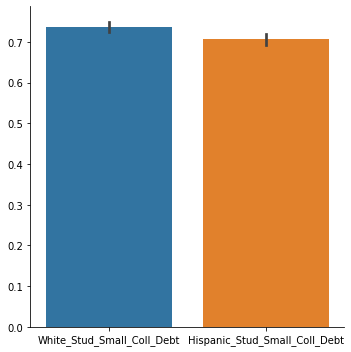

In [ ]:
category_order = ['White_Stud_Small_Coll_Debt','Hispanic_Stud_Small_Coll_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()

Finally, we have to reject the null hypothesis that there is no significant difference between average debt of White and Hispanic students in small colleges. Our p-value is .0007 which is < .05. The means are visibly different at White (.74) and Hispanic at (.71) average college debt at small colleges. We must accept the alternate hypothesis in this case. 

Now let's look to see if there is a difference between White and Asian students' average college debt in small colleges. 

In [ ]:
college_debt_1['Asian_Stud_Coll_Debt'] = college_debt_1['Asian'] & college_debt_1['GRAD_DEBT_MDN_SUPP']

In [ ]:
college_debt_1['Asian_Stud_Small_Coll_Debt'] = college_debt_1['Small College'] & college_debt_1['Asian_Stud_College_Debt']

In [ ]:
def series_statistics(column):
  print('statistics: {}'.format(column.name))
  print('The max value: {}'.format(column.max()))
  print('The min value: {}'.format(column.min()))
  print('The mode value: {}'.format(column.mode()))
  print('The median value: {}'.format(column.median()))
  print('The mean: {}'.format(column.mean()))
  print('The std: {}'.format(column.std()))

In [ ]:
series_statistics(college_debt_1['White_Stud_Small_Coll_Debt'].astype(int))

statistics: White_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.7370543293718166
The std: 0.44027989257073435


In [ ]:
series_statistics(college_debt_1['Asian_Stud_Small_Coll_Debt'].astype(int))

statistics: Asian_Stud_Small_Coll_Debt
The max value: 1
The min value: 0
The mode value: 0    1
dtype: int64
The median value: 1.0
The mean: 0.5880730050933786
The std: 0.4922342598014026


In [ ]:
mean1 = np.mean(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))
std1 = np.std(np.array(college_debt_1['White_Stud_Small_Coll_Debt']), ddof = 1)
nobs1 = len(np.array(college_debt_1['White_Stud_Small_Coll_Debt']))

mean2 = np.mean(np.array(college_debt_1['Asian_Stud_Small_Coll_Debt']))
std2 = np.std(np.array(college_debt_1['Asian_Stud_Small_Coll_Debt']), ddof = 1)
nobs2 = len(np.array(college_debt_1['Asian_Stud_Small_Coll_Debt']))

ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = nobs1, mean2 = mean2, std2 = std2, nobs2 = nobs2, equal_var = False) 

Ttest_indResult(statistic=15.485350454186948, pvalue=2.0145409849777485e-53)

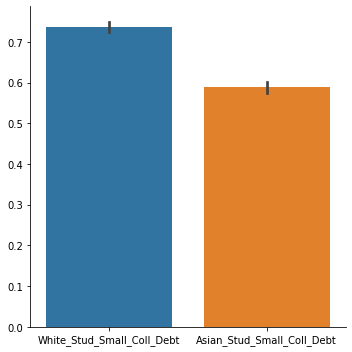

In [ ]:
category_order = ['White_Stud_Small_Coll_Debt','Asian_Stud_Small_Coll_Debt']

sns.catplot(data = college_debt_1, kind = "bar", order = category_order)

sns.despine()

plt.show()

Again, we have to reject the null hypothesis that there is no significant difference between average debt of White and Asian students in small colleges. Our p-value is
 2.01e-53 which is definitely smaller than < .05. The means are visibly different at White students' (.73) and Asian students' (.58) average college debt at small colleges. We must accept the alternate hypothesis in this case as well.  

**Main conclusions:** 

There's a moderate correlation between Graduate Debt and Median Earnings. There are some stronger patterns if we take region into consideration. The Southeast appears to have higher debt and lower median income which makes sense because the cost of living in the Southeast is fairly low compared to the rest of the United States. That is troubling for graduates in the Southeast that must pay back their debt on lower wages.   

We found that in large universities there is no significant difference between White students' average debt and that of Hispanic, Black or Asian students.

In the case of small colleges there is not signficant difference between White and Black students' average debt. However between White and Hispanic and White and Asian students, there's a significant difference in average college debt in small colleges. That is what the data tells us based on descriptive statistics, barplots and two sample independent t-tests.  